In [5]:
import pandas as pd
import numpy as np

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

df = pd.read_csv(url)
df.head(10)


,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [6]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

In [7]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [8]:
df.replace('?', np.nan, inplace = True)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


# How to handle missing Data 
For continuous attributes (e.g., age), replace missing values with the mean.
For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
Update the data types of the respective columns.
Verify the update using df.info()

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv(url)

# Check if the 'smoker' column exists
if 'smoker' not in df.columns:
    print("The 'smoker' column is missing.")
    # Handle this 


The 'smoker' column is missing.


In [11]:
import pandas as pd

# Load the DataFrame with specified column names
df = pd.read_csv(url, names=['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region', 'charges'])

# Now you can proceed with your analysis
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].fillna(is_smoker, inplace=True)



In [12]:
df.replace('?', np.nan, inplace = True)

In [13]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int32  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int32  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB
None


In [14]:
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())

   age  gender     bmi  no_of_children  smoker  region   charges
0   19       1  27.900               0       1       3  16884.92
1   18       2  33.770               1       0       4   1725.55
2   28       2  33.000               3       0       4   4449.46
3   33       2  22.705               0       0       1  21984.47
4   32       2  28.880               0       0       1   3866.86


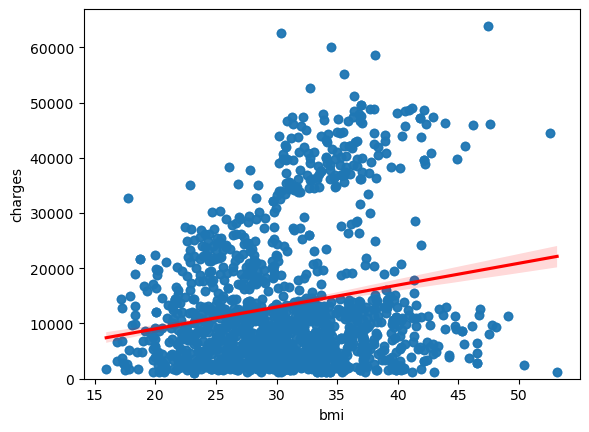

In [15]:
# Explaratory Data Analysis 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined
# Exploratory Data Analysis 
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)
plt.show()


<Axes: xlabel='smoker', ylabel='charges'>

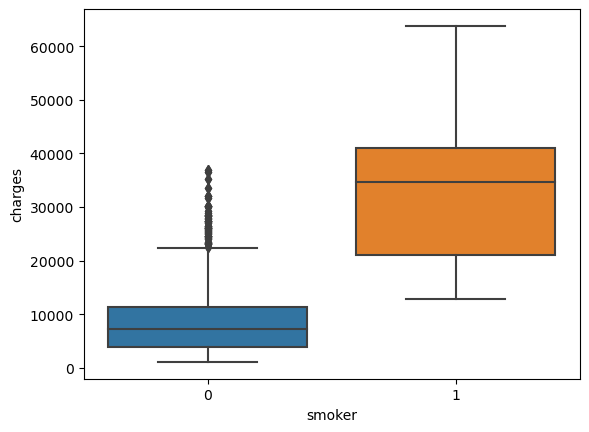

In [16]:
sns.boxplot(x="smoker", y="charges", data=df)

In [17]:
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


Model Development 
Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the 
 score of this model.

In [18]:
from sklearn.linear_model import LinearRegression
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6221791733924185


Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the 
 score of this model. You should see an improvement in the performance.

In [19]:
# definition of Y and lm remain same as used in last cell. 
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7504083820289634


Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))



import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  # Add this import

# Assuming Y and Z are already defined
# Assuming pipe is already defined

# Fit the pipeline to the data
pipe.fit(Z, Y)

# Make predictions
ypipe = pipe.predict(Z)

# Assuming you have actual target values (Y) and predicted values (ypipe)
r2 = r2_score(Y, ypipe)
print(f"R-squared score: {r2}")


0.8452574046807049
R-squared score: 0.8452574046807049


Model refinement - Splitting the data into train and test where 80% of the data will be attributed towards training and the rest 20% towards splitting. 

In [29]:
from sklearn.model_selection import train_test_split

# Assuming Z and Y are your feature and target data
X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

Initialize a Ridge regressor that used hyperparameter 
. Fit the model using training data data subset. Print the 
 score for the testing data.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Assuming Z and Y are your feature and target data
X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(X_train, y_train)
yhat = RidgeModel.predict(X_test)
print(f"R-squared score: {r2_score(y_test, yhat)}")

R-squared score: 0.6760807731582408


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the 
 score for the testing subset.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Assuming Z and Y are your feature and target data
X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

pr = PolynomialFeatures(degree=2)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.transform(X_test)

RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(X_train_pr, y_train)
yhat = RidgeModel.predict(X_test_pr)
print(f"R-squared score: {r2_score(y_test, yhat)}")

R-squared score: 0.7835631107608149
